# IBM Applied Data Science Capstone Project <br>
<br>
<br>

## Introduction 
#### *Description of the problem and a discussion of the background*

In a scenario we want to find a house in silicon valley, we narrow down the search into 5 cities in south bay & east bay areas: Cupertino, Sunnyvale, Milpitas, Fremont and Pleasanton. First of all, we want to know where are they, as well as some basic information, such as population, median household income, median house value, top employers and local schools. Then we will dig a little bit more details, such as demographics profile, population change in recent years, education ratings. As we may not able to obtain all data from one single source, we want to do a comparison of one single dataset from various sources. Furthermore, we want to explore the neighborhoods (using zipcode to represent) and find out whether there are similar neighborhoods in more affordable areas with those in expensive areas. 

## Data and Methodology
#### *Description of the data and how it will be used to solve the problem*

*Demographic information* and *Zipcode* are obtained from **Zipcode.org**. Information of *demographics profile*, *population of 2010* from the United States Census, *estimated population of 2019* and *local top employers* are obtained from **Wikipedia**. Getting **Niche** grades for *Public schools, Housing, Good for families and Cost of living* and median house value, median household income, high school names from its website. <br>
From **opendatasoft.com**, we retrieve *latitude and longitude* information for each zipcode. With them, we make enquiry to **Foursquare** for location data.

<font color=blue>1, Demographic Information and Zipcode: </font>
<a href="https://zipcode.org/state/california" > zipcode.org </a> <br>

<font color=blue>2, Demographic and Economic Data from Wikipedia: </font>
<a href="https://en.wikipedia.org/wiki/Main_Page" > wikipedia.org </a> <br>

<font color=blue>3, Living and Educational Data from NICHE: </font>
<a href="https://www.niche.com/?ref=places-to-live" > niche.com </a> <br>

<font color=blue>4, Zip Code Latitude and Longitude: </font>
<a href="https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/table/" > opendatasoft.com </a> <br>

<font color=blue>5, Neighborhoods Information: </font>
<a href="https://foursquare.com/developers/apps " > foursquare.com </a>

First using **Folium** to show the map of the region. <br>
Then creating **Pandas** DataFrame of collected information from Zipcode.org, Wikipedia and NICHE respectively. <br>
Using **Matplotlib** and **Seaborn** to plot chats to visualize: <br>
1, Population and demographics profile <br>
2, Population change from 2010 to 2019 <br>
3, Median house value and household income <br>
4, Population data comparison from Zipcode.org, Wikipedia and NICHE <br>
With these, we combine three DataFrame into one DataFrame to summary all information we want to know except for location data, for instance: city, population, public school ratings, median house value and household income, rent, high schools, top local employers, zipcodes (neighborhoods). 

Print each Zipcode along with the top 5 most common venues from **Foursquare**. Explore and cluster the neighborhoods using k-means clustering from machine learning library **SciKit Learn**. Visualize the resulting clusters on regional map with **Folium** with colored zipcode dots representing different neighborhood category type.

## Results

All 5 cities are very nice places to live because of high rating education, renowned employers and active neighborhoods. 
However, cost of living and house price are pretty high in all cities. Population in the region has slight increment in rent ten years, and all 5 cities have the same trend. Medium household incomes of 5 cities are in the same range, the cities of **Milpitas, Fremont and Pleasanton** have relatively more affordable house price. One neighborhood in **Pleasanton** falls in the same cluster of Cupertino and Sunnyvale (Cluster 1, red dot), featured with restaurants, shops and gyms. Another neighborhood in Pleasanton is in one cluster with major neighborhoods from **Fremont and Milpitas** (Cluster 4, green dot), owning lots of worldwide cuisines, entertainments and parks. 

## Discussion

**Folium** is really cool and fun to use. <br>
**Seaborn** and **Matplotlib** lack certain freedom for data representing due to my limited experience with them, but in general, both are very useful. In my plan, I thought of bar, box, pie, scatter, bubble charts and more, with hue and style to display multiple data. But I end with using simple bar chart and line plot. <br>

## Conclusion

In this capstone project, **Tools for Data Science**(Course #2, Jupyter notebook), **Data Science Methodology** (Course #3, Business understanding - Analytic approach - Data requirement - Data collection - Data understanding - Data preparation - Modeling - Evaluation - Deployment - Feedback), **Data Analysis with Python** (Course #6), **Data Visualization with Python** (Course #7) and **Machine Learning with Python** (Course #8) are all touched. It is also a real case study, anyone who is moving to bay area may get a little bit hint looking at collected data from **Wikipedia, NICHE, and Foursquare**. Pleasanton seems to be an alternative choice to Cupertino and Sunnyvale with less living cost (but with longer commute to central silicon valley).  

In [279]:
import pandas as pd
import numpy as np
import folium # map rendering library

import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from sklearn.cluster import KMeans
print('Libraries imported.')

Libraries imported.


## Map of area: cities of Cupertino, Sunnyvale, Milpitas, Fremont and Pleasanton

In [280]:
# create map of San Jose, California using latitude and longitude values
# San Jose 37.3382° N, 121.8863° W
map_sanjose = folium.Map(location=[37.5082,-121.9863],zoom_start=10)
map_sanjose 

## Demographic Information

<a href="https://zipcode.org/city/CA/CUPERTINO" > Cupertino </a> <br>
<a href="https://zipcode.org/city/CA/SUNNYVALE" > Sunnyvale </a> <br>
<a href="https://zipcode.org/city/CA/MILPITAS" > Milpitas </a> <br>
<a href="https://zipcode.org/city/CA/FREMONT" > Fremont</a> <br>
<a href="https://zipcode.org/city/CA/PLEASANTON" > Pleasanton </a>

In [281]:
Cupertino = ['Cupertino','54412', '27209', '412', '2351', '24156','$654900', '$100020', '95014, 95015']
Sunnyvale = ['Sunnyvale', '131018', '69904', '2891', '19852', '42414', '$452400', '$74240', '94085, 94086, 94087, 94088, 94089']
Milpitas = ['Milpitas', '62840', '19480', '2295', '10432', '32487', '$373000', '$84565', '95035, 95036']
Fremont = ['Fremont', '203417', '97074', '6316', '27500', '75011', '$382700','$81142', '94536, 94537, 94538, 94539, 94555']
Pleasanton = ['Pleasanton', '65221', '52509', '886', '5126', '7571', '$436800', '$91376', '94566, 94588']

In [282]:
# define the dataframe columns
column_names = ['City','Population','White', 'Black', 'Hispanic', 'Asian', 'House_value', 'Household_income', 'Zipcode']

# instantiate the dataframe
df = pd.DataFrame(columns = column_names, data = [Cupertino, Sunnyvale, Milpitas, Fremont, Pleasanton])

In [283]:
df

,City,Population,White,Black,Hispanic,Asian,House_value,Household_income,Zipcode
0,Cupertino,54412,27209,412,2351,24156,$654900,$100020,"95014, 95015"
1,Sunnyvale,131018,69904,2891,19852,42414,$452400,$74240,"94085, 94086, 94087, 94088, 94089"
2,Milpitas,62840,19480,2295,10432,32487,$373000,$84565,"95035, 95036"
3,Fremont,203417,97074,6316,27500,75011,$382700,$81142,"94536, 94537, 94538, 94539, 94555"
4,Pleasanton,65221,52509,886,5126,7571,$436800,$91376,"94566, 94588"


In [284]:
df.dtypes

City                object
Population          object
White               object
Black               object
Hispanic            object
Asian               object
House_value         object
Household_income    object
Zipcode             object
dtype: object

In [286]:
df[['Population', 'White', 'Black', 'Hispanic', 'Asian']] = df[['Population', 'White', 'Black', 'Hispanic', 'Asian']].astype(int)

In [287]:
df.dtypes

City                object
Population           int32
White                int32
Black                int32
Hispanic             int32
Asian                int32
House_value         object
Household_income    object
Zipcode             object
dtype: object

## Visualize Population Data using Seaborn and Matplotlib

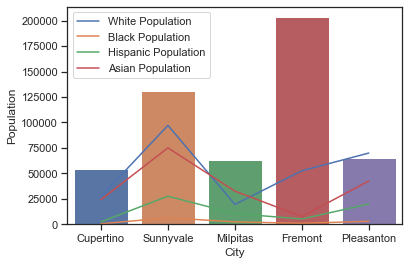

In [288]:
sns.set(style = 'ticks') #white background

sns.lineplot(x = 'City', y = 'White', data = df, label = 'White Population')
sns.lineplot(x = 'City', y = 'Black', data = df, label = 'Black Population')
sns.lineplot(x = 'City', y = 'Hispanic', data = df, label = 'Hispanic Population')
sns.lineplot(x = 'City', y = 'Asian', data = df, label = 'Asian Population')
sns.barplot(x = 'City', y = 'Population', data = df)

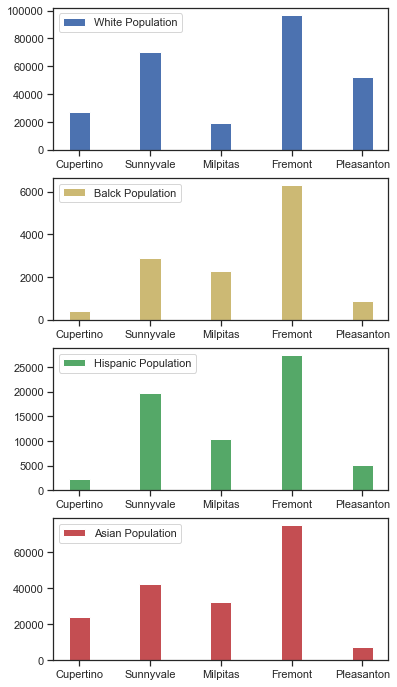

In [289]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
ax1.bar(df.City, df.White, width, color = 'b', label='White Population')
ax2.bar(df.City, df.Black, width, color = 'y', label='Balck Population')    
ax3.bar(df.City, df.Hispanic, width, color = 'g', label='Hispanic Population')
ax4.bar(df.City, df.Asian, width, color = 'r', label='Asian Population')  

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

fig = plt.gcf()
fig.set_size_inches(6, 12)

##  Data from Wikipedia.org

<a href="https://en.wikipedia.org/wiki/Cupertino,_California" > Cupertino Wiki</a> <br>
<a href="https://en.wikipedia.org/wiki/Sunnyvale,_California" > Sunnyvale Wiki</a> <br>
<a href="https://en.wikipedia.org/wiki/Milpitas,_California" > Milpitas Wiki</a> <br>
<a href="https://en.wikipedia.org/wiki/Fremont,_California" > Fremont Wiki</a> <br>
<a href="https://en.wikipedia.org/wiki/Pleasanton,_California" > Pleasanton Wiki</a>

In [290]:
Cupertino_wiki = ['Cupertino','59276', '58302', '18270', '344', '2113', '36895','$118635', 'Apple, Seagate']
Sunnyvale_wiki = ['Sunnyvale', '152703', '140081', '48323', '2533', '26517', '57012', 'NaN', 'Google, Juniper, Lockheed Martin, Yahoo!, LinkedIn']
Milpitas_wiki = ['Milpitas', '84196', '66790', '9751', '1836', '11240', '41308','$84429', 'Cisco, KLA, Sandisk, Flex']
Fremont_wiki = ['Fremont', '241110', '214089', '56766', '6743', '31698', '107679','$122191', 'Tesla, Lam, Western Digital, Boston Scientific']
Pleasanton_wiki = ['Pleasanton', '81777', '70285', '42738', '1116', '7264 ', '16209','$121622 ', 'Workday, Kaiser Permanente, Oracle, Safeway']

In [291]:
# define the dataframe columns
column_wiki = ['City','Pop_Estimate2019','Population_2010','White', 'Black', 'Hispanic', 'Asian', 'Household_income', 'Top_employers']

# instantiate the dataframe
df_wiki = pd.DataFrame(columns = column_wiki, data = [Cupertino_wiki, Sunnyvale_wiki, Milpitas_wiki, Fremont_wiki, Pleasanton_wiki])

In [292]:
df_wiki

,City,Pop_Estimate2019,Population_2010,White,Black,Hispanic,Asian,Household_income,Top_employers
0,Cupertino,59276,58302,18270,344,2113,36895,$118635,"Apple, Seagate"
1,Sunnyvale,152703,140081,48323,2533,26517,57012,NaN,"Google, Juniper, Lockheed Martin, Yahoo!, Link..."
2,Milpitas,84196,66790,9751,1836,11240,41308,$84429,"Cisco, KLA, Sandisk, Flex"
3,Fremont,241110,214089,56766,6743,31698,107679,$122191,"Tesla, Lam, Western Digital, Boston Scientific"
4,Pleasanton,81777,70285,42738,1116,7264,16209,$121622,"Workday, Kaiser Permanente, Oracle, Safeway"


In [293]:
df_wiki[['Pop_Estimate2019', 'Population_2010', 'White','Black', 'Hispanic', 'Asian']] = df_wiki[['Pop_Estimate2019', 'Population_2010', 'White','Black', 'Hispanic', 'Asian']].astype(int)

#### Populaiton change from 2000 to 2019

Text(0, 0.5, 'Population')

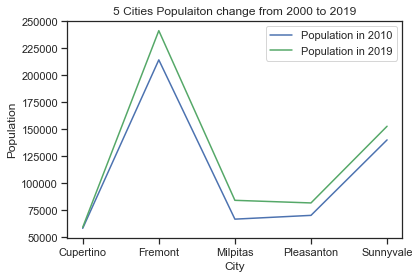

In [294]:
sns.set(style = 'ticks') #white background

sns.lineplot(x = 'City', y = 'Population_2010', data = df_wiki, color = 'b', label = 'Population in 2010')
sns.lineplot(x = 'City', y = 'Pop_Estimate2019', data = df_wiki, color = 'g', label = 'Population in 2019')

plt.title ('5 Cities Populaiton change from 2000 to 2019')
plt.xlabel ('City')
plt.ylabel ('Population')

##  Data from NICHE.com

<a href="https://www.niche.com/places-to-live/cupertino-santa-clara-ca/" > Cupertino_niche </a> <br>
<a href="https://www.niche.com/places-to-live/sunnyvale-santa-clara-ca/" > Sunnyvale_niche </a> <br>
<a href="https://www.niche.com/places-to-live/milpitas-santa-clara-ca/" > Milpitas_niche </a> <br>
<a href="https://www.niche.com/places-to-live/fremont-alameda-ca/" > Fremont_niche </a> <br>
<a href="https://www.niche.com/places-to-live/pleasanton-alameda-ca/" > Pleasanton_niche </a>

In [295]:
Cupertino_niche = ['Cupertino','60614', 'A+', 'C+', 'A+', 'D','1584600', '3005', '163954', 'Mountain View']
Sunnyvale_niche = ['Sunnyvale', '152323', 'A', 'C+', 'A+', 'D+','1111800', '2332', '131791', 'Monta Vista, Homestead, Cupertino']
Milpitas_niche = ['Milpitas', '77457', 'A', 'C', 'A', 'D','782300', '2241', '125161', 'Milpitas']
Fremont_niche = ['Fremont', '233083', 'A', 'C', 'A', 'D','863800', '2188', '127374', 'Mission San Jose, Irvington, American']
Pleasanton_niche = ['Pleasanton', '80847', 'A+', 'C+', 'A+', 'D+','933500','2251', '148852', 'Amador Valley, Foothill']

In [296]:
# define the dataframe columns
column_niche = ['City','Population','Public Schools','Housing', 'Good for Families', 'Cost of Living', 'House_value', 'Rent', 'Household_income', 'High Schools']

# instantiate the dataframe
df_niche = pd.DataFrame(columns = column_niche, data = [Cupertino_niche, Sunnyvale_niche, Milpitas_niche, Fremont_niche, Pleasanton_niche])

In [297]:
df_niche

,City,Population,Public Schools,Housing,Good for Families,Cost of Living,House_value,Rent,Household_income,High Schools
0,Cupertino,60614,A+,C+,A+,D,1584600,3005,163954,Mountain View
1,Sunnyvale,152323,A,C+,A+,D+,1111800,2332,131791,"Monta Vista, Homestead, Cupertino"
2,Milpitas,77457,A,C,A,D,782300,2241,125161,Milpitas
3,Fremont,233083,A,C,A,D,863800,2188,127374,"Mission San Jose, Irvington, American"
4,Pleasanton,80847,A+,C+,A+,D+,933500,2251,148852,"Amador Valley, Foothill"


In [298]:
df_niche[['Population', 'Rent', 'House_value', 'Household_income']] = df_niche[['Population', 'Rent', 'House_value', 'Household_income']].astype(int)

Text(0, 0.5, 'Media $')

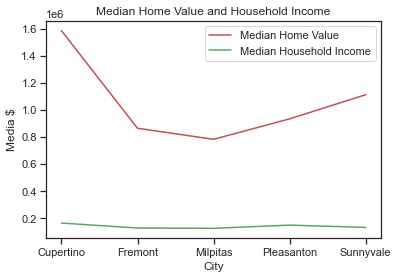

In [189]:
sns.set(style = 'ticks') #white background

sns.lineplot(x = 'City', y = 'House_value', data = df_niche, color = 'r', label = 'Median Home Value')
sns.lineplot(x = 'City', y = 'Household_income', data = df_niche, color = 'g', label = 'Median Household Income')

plt.title ('Median Home Value and Household Income')
plt.xlabel ('City')
plt.ylabel ('Media $')

## Comparing Population Data from different sources

Text(0, 0.5, 'Population')

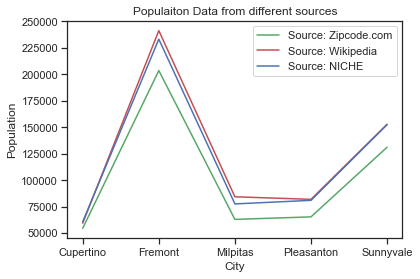

In [299]:
sns.set(style = 'ticks') #white background

sns.lineplot(x = 'City', y = 'Population', data = df, color = 'g', label = 'Source: Zipcode.com')
sns.lineplot(x = 'City', y = 'Pop_Estimate2019', data = df_wiki, color = 'r', label = 'Source: Wikipedia')
sns.lineplot(x = 'City', y = 'Population', data = df_niche, color = 'b', label = 'Source: NICHE')

plt.title ('Populaiton Data from different sources')
plt.xlabel ('City')
plt.ylabel ('Population')

## Combine Datasets

In [300]:
df_combine = df_niche
df_combine[['Top Employers']] = df_wiki[['Top_employers']]
df_combine[['Zipcode']] = df[['Zipcode']]
df_combine

,City,Population,Public Schools,Housing,Good for Families,Cost of Living,House_value,Rent,Household_income,High Schools,Top Employers,Zipcode
0,Cupertino,60614,A+,C+,A+,D,1584600,3005,163954,Mountain View,"Apple, Seagate","95014, 95015"
1,Sunnyvale,152323,A,C+,A+,D+,1111800,2332,131791,"Monta Vista, Homestead, Cupertino","Google, Juniper, Lockheed Martin, Yahoo!, Link...","94085, 94086, 94087, 94088, 94089"
2,Milpitas,77457,A,C,A,D,782300,2241,125161,Milpitas,"Cisco, KLA, Sandisk, Flex","95035, 95036"
3,Fremont,233083,A,C,A,D,863800,2188,127374,"Mission San Jose, Irvington, American","Tesla, Lam, Western Digital, Boston Scientific","94536, 94537, 94538, 94539, 94555"
4,Pleasanton,80847,A+,C+,A+,D+,933500,2251,148852,"Amador Valley, Foothill","Workday, Kaiser Permanente, Oracle, Safeway","94566, 94588"


## Zip Code Latitude and Longitude

<a href="https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/table/" > public.opendatasoft.com</a>


In [301]:
Z95014 = ['95014', 'Cupertino', '37.318', '-122.048']
Z95015 = ['95015', 'Cupertino', '37.189', '-121.705']
Z94085 = ['94085', 'Sunnyvale', '37.389', '-122.018']
Z94086 = ['94086', 'Sunnyvale', '37.378', '-122.024']
Z94087 = ['94087', 'Sunnyvale', '37.350', '-122.036' ]
Z94088 = ['94088', 'Sunnyvale', '37.189', '-121.705' ]
Z94089 = ['94089', 'Sunnyvale', '37.406', '-122.008']
Z95035 = ['95035', 'Milpitas', '37.436', '-121.894']
Z95036 = ['95036', 'Milpitas', '37.457', '-121.914']
Z94536 = ['94536', 'Fremont', '37.562', '-121.994']
Z94537 = ['94537', 'Fremont', '37.680', '-121.921']
Z94538 = ['94538', 'Fremont', '37.527', '-121.968']
Z94539 = ['94539', 'Fremont', '37.515', '-121.929']
Z94555 = ['94555', 'Fremont', '37.572', '-122.051' ]
Z94566 = ['94566', 'Pleasanton', '37.659', '-121.871']
Z94588 = ['94588', 'Pleasanton', '37.690', '-121.892']

In [302]:
# define the dataframe columns
column_zipcode = ['Zipcode', 'City','Latitude','Longitude']

# instantiate the dataframe
df_zipcode = pd.DataFrame(columns = column_zipcode, data = [Z95014, Z95015, Z94085, Z94086, Z94087, Z94088, Z94089, Z95035, Z95036, Z94536, Z94537, Z94538, Z94539, Z94555, Z94566, Z94588
    ])

In [266]:
df_zipcode

,Zipcode,City,Latitude,Longitude
0,95014,Cupertino,37.318,-122.048
1,95015,Cupertino,37.189,-121.705
2,94085,Sunnyvale,37.389,-122.018
3,94086,Sunnyvale,37.378,-122.024
4,94087,Sunnyvale,37.350,-122.036
5,94088,Sunnyvale,37.189,-121.705
6,94089,Sunnyvale,37.406,-122.008
7,95035,Milpitas,37.436,-121.894
8,95036,Milpitas,37.457,-121.914
9,94536,Fremont,37.562,-121.994


In [303]:
df_zipcode.dtypes

Zipcode      object
City         object
Latitude     object
Longitude    object
dtype: object

In [306]:
df_zipcode[['Latitude', 'Longitude']]=df_zipcode[['Latitude', 'Longitude']].astype(float)

### Explore and cluster the neighborhoods

#### Create a map with neighborhoods (Zipcodes) superimposed on top

#### Define Foursquare Credentials and Version

In [216]:
CLIENT_ID = '0CFTUVJ0H0DO5TYYGH4BCVKO0TKDXEK5B5NZKYLPUOZS4VYP' # your Foursquare ID
CLIENT_SECRET = '21202ZLH0F0Z1JOG2KTIRRZ5SZRLTYGNGUVFFZ3ZASQGCXUK' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0CFTUVJ0H0DO5TYYGH4BCVKO0TKDXEK5B5NZKYLPUOZS4VYP
CLIENT_SECRET:21202ZLH0F0Z1JOG2KTIRRZ5SZRLTYGNGUVFFZ3ZASQGCXUK


#### Explore the first neighborhood in dataframe

In [222]:
df_zipcode.head()

,Zipcode,City,Latitude,Longitude
0,95014,Cupertino,37.318,-122.048
1,95015,Cupertino,37.189,-121.705
2,94085,Sunnyvale,37.389,-122.018
3,94086,Sunnyvale,37.378,-122.024
4,94087,Sunnyvale,37.350,-122.036


In [223]:
df_zipcode.loc[0, 'Zipcode':'City']

Zipcode        95014
City       Cupertino
Name: 0, dtype: object

#### Get the Zipcode's latitude and longitude values

In [225]:
neighborhood_latitude = df_zipcode.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_zipcode.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_zipcode.loc[0, 'Zipcode'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of 95014 are 37.318, -122.048.


#### Get the top 100 venues that are in 1st Zipcode within a radius of 3219 meters ( 2 miles )

In [226]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 3219 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET,
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=0CFTUVJ0H0DO5TYYGH4BCVKO0TKDXEK5B5NZKYLPUOZS4VYP&client_secret=21202ZLH0F0Z1JOG2KTIRRZ5SZRLTYGNGUVFFZ3ZASQGCXUK&v=20180605&ll=37.318,-122.048&radius=3219&limit=100'

#### Send the GET request and examine the resutls

In [229]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ed462491835dd001bfe222d'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Cupertino',
  'headerFullLocation': 'Cupertino',
  'headerLocationGranularity': 'city',
  'totalResults': 180,
  'suggestedBounds': {'ne': {'lat': 37.346971028971026,
    'lng': -122.0116394410654},
   'sw': {'lat': 37.28902897102897, 'lng': -122.0843605589346}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '50fdc25ae4b04512b03ac1a4',
       'name': 'Apple Fitness Center Results Way',
       'location': {'address': '16 Results Way',
        'crossStreet': 'at Bubb',
        'lat': 37.31749019319874,
        'lng': -122.0511286659

In [230]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [231]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Apple Fitness Center Results Way,Gym,37.317490,-122.051129
1,Whole Foods Market,Grocery Store,37.323478,-122.039759
2,Shane Co.,Jewelry Store,37.323249,-122.046537
3,Ike's Sandwiches,Sandwich Place,37.322801,-122.041220
4,Paul & Eddie's Monta Vista Inn,Dive Bar,37.323225,-122.051596


#### Display how many venues were returned by Foursquare?

In [232]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


#### Create a function to repeat the same process to all the neighborhoods

In [233]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Run the above function on each neighborhood and create a new dataframe called *df_venues*

In [235]:
df_venues = getNearbyVenues(names=df_zipcode['Zipcode'],
                                   latitudes=df_zipcode['Latitude'],
                                   longitudes=df_zipcode['Longitude']
                                  )


95014
95015
94085
94086
94087
94088
94089
95035
95036
94536
94537
94538
94539
94555
94566
94588


#### Check the size of the resulting dataframe, and how many venues were returned for each neighborhood

In [236]:
print(df_venues.shape)
df_venues.head()

(194, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,95014,37.318,-122.048,Apple Fitness Center Results Way,37.317490,-122.051129,Gym
1,95014,37.318,-122.048,Fujitsu Planetarium De Anza College,37.318837,-122.046217,Planetarium
2,95014,37.318,-122.048,Redbox,37.315592,-122.049630,Video Store
3,95014,37.318,-122.048,7-Eleven,37.315175,-122.050112,Convenience Store
4,95014,37.318,-122.048,Coffee Luvvelo,37.320743,-122.045750,Café


In [237]:
df_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
94085,13,13,13,13,13,13
94086,4,4,4,4,4,4
94087,11,11,11,11,11,11
94088,1,1,1,1,1,1
94089,10,10,10,10,10,10
94536,6,6,6,6,6,6
94537,3,3,3,3,3,3
94538,6,6,6,6,6,6
94539,3,3,3,3,3,3


In [238]:
print('There are {} uniques categories.'.format(len(df_venues['Venue Category'].unique())))

There are 103 uniques categories.


### Analyze Each Zipcode

In [242]:
# one hot encoding
zipcode_onehot = pd.get_dummies(df_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
zipcode_onehot['Neighborhood'] = df_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [zipcode_onehot.columns[-1]] + list(zipcode_onehot.columns[:-1])
zipcode_onehot = zipcode_onehot[fixed_columns]

zipcode_onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,Assisted Living,Auto Workshop,BBQ Joint,Bakery,Bank,Bookstore,Breakfast Spot,...,Tea Room,Tennis Court,Theater,Trail,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Yoga Studio,Zoo
0,95014,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,95014,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,95014,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,95014,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,95014,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [243]:
zipcode_onehot.shape

(194, 104)

#### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [244]:
zipcode_grouped = zipcode_onehot.groupby('Neighborhood').mean().reset_index()
zipcode_grouped

,Neighborhood,American Restaurant,Asian Restaurant,Assisted Living,Auto Workshop,BBQ Joint,Bakery,Bank,Bookstore,Breakfast Spot,...,Tea Room,Tennis Court,Theater,Trail,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Yoga Studio,Zoo
0,94085,0.000000,0.0,0.000000,0.076923,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.076923,0.00,0.000000,0.000000,0.0
1,94086,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.0
2,94087,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.090909,...,0.000000,0.090909,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.0
3,94088,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.0
4,94089,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.0
5,94536,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.0
6,94537,0.000000,0.0,0.333333,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.333333,0.00,0.000000,0.00,0.000000,0.000000,0.0
7,94538,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.166667,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.0
8,94539,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.0
9,94555,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.2


In [245]:
zipcode_grouped.shape

(16, 104)

### Print each Zipcode along with the top 5 most common venues

In [247]:
num_top_venues = 5

for hood in zipcode_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = zipcode_grouped[zipcode_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----94085----
                     venue  freq
0                     Park  0.15
1               Laundromat  0.08
2  Health & Beauty Service  0.08
3               Restaurant  0.08
4               Donut Shop  0.08


----94086----
                 venue  freq
0                 Park  0.25
1            Hotel Bar  0.25
2    German Restaurant  0.25
3   Chinese Restaurant  0.25
4  American Restaurant  0.00


----94087----
                  venue  freq
0                  Café  0.09
1         Jewelry Store  0.09
2            Sports Bar  0.09
3  Gym / Fitness Center  0.09
4            Restaurant  0.09


----94088----
                     venue  freq
0                Gift Shop   1.0
1      American Restaurant   0.0
2            Jewelry Store   0.0
3  Scandinavian Restaurant   0.0
4           Sandwich Place   0.0


----94089----
                venue  freq
0  Light Rail Station   0.1
1                 Gym   0.1
2      Sandwich Place   0.1
3   Indian Restaurant   0.1
4     Bubble Tea Shop   0.1


--

####  Put that into a pandas dataframe

In [248]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Create the new dataframe and display the top 10 venues for each neighborhood

In [253]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = zipcode_grouped['Neighborhood']

for ind in np.arange(zipcode_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(zipcode_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,94085,Park,Supermarket,Laundromat,Restaurant,Pizza Place,Convenience Store,Liquor Store,Taco Place,Donut Shop,Health & Beauty Service
1,94086,German Restaurant,Hotel Bar,Park,Chinese Restaurant,Gas Station,Eye Doctor,Falafel Restaurant,Farmers Market,Filipino Restaurant,Food
2,94087,Mexican Restaurant,Tennis Court,Falafel Restaurant,Sports Bar,Gas Station,Café,Restaurant,Breakfast Spot,Pool,Gym / Fitness Center
3,94088,Gift Shop,German Restaurant,Dumpling Restaurant,Eye Doctor,Falafel Restaurant,Farmers Market,Filipino Restaurant,Food,Food Truck,Fried Chicken Joint
4,94089,Sandwich Place,Light Rail Station,Cosmetics Shop,Grocery Store,Burger Joint,Bubble Tea Shop,Gym,Coffee Shop,Pizza Place,Indian Restaurant
5,94536,Optical Shop,Eye Doctor,Lake,Gym / Fitness Center,Convenience Store,Park,Zoo,Falafel Restaurant,Farmers Market,Filipino Restaurant
6,94537,Dog Run,Assisted Living,Trail,German Restaurant,Dumpling Restaurant,Eye Doctor,Falafel Restaurant,Farmers Market,Filipino Restaurant,Food
7,94538,Business Service,Theater,Pizza Place,Pharmacy,Construction & Landscaping,Donut Shop,Hawaiian Restaurant,Health & Beauty Service,Eye Doctor,Falafel Restaurant
8,94539,Dog Run,Home Service,Playground,Gas Station,Dumpling Restaurant,Eye Doctor,Falafel Restaurant,Farmers Market,Filipino Restaurant,Food
9,94555,Zoo,Dive Bar,Lounge,Park,Bus Station,Gas Station,Eye Doctor,Falafel Restaurant,Farmers Market,Filipino Restaurant


## Cluster Zipcode

#### Run k-means to cluster the neighborhood into 5 clusters

In [254]:
# set number of clusters
kclusters = 5

zipcode_grouped_clustering = zipcode_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(zipcode_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


array([3, 3, 3, 1, 0, 3, 4, 3, 2, 3])

#### Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

In [255]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,94085,Park,Supermarket,Laundromat,Restaurant,Pizza Place,Convenience Store,Liquor Store,Taco Place,Donut Shop,Health & Beauty Service
1,94086,German Restaurant,Hotel Bar,Park,Chinese Restaurant,Gas Station,Eye Doctor,Falafel Restaurant,Farmers Market,Filipino Restaurant,Food
2,94087,Mexican Restaurant,Tennis Court,Falafel Restaurant,Sports Bar,Gas Station,Café,Restaurant,Breakfast Spot,Pool,Gym / Fitness Center
3,94088,Gift Shop,German Restaurant,Dumpling Restaurant,Eye Doctor,Falafel Restaurant,Farmers Market,Filipino Restaurant,Food,Food Truck,Fried Chicken Joint
4,94089,Sandwich Place,Light Rail Station,Cosmetics Shop,Grocery Store,Burger Joint,Bubble Tea Shop,Gym,Coffee Shop,Pizza Place,Indian Restaurant


In [260]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

ValueError: cannot insert Cluster Labels, already exists

In [307]:
zipcode_merged = df_zipcode

# merge with df_zipcode to add latitude/longitude for each neighborhood
zipcode_merged = zipcode_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Zipcode')

zipcode_merged # check the last columns!

,Zipcode,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,95014,Cupertino,37.318,-122.048,0,Coffee Shop,Sculpture Garden,Planetarium,Video Store,Gym,Convenience Store,Soccer Field,Café,Fried Chicken Joint,Dumpling Restaurant
1,95015,Cupertino,37.189,-121.705,1,Gift Shop,German Restaurant,Dumpling Restaurant,Eye Doctor,Falafel Restaurant,Farmers Market,Filipino Restaurant,Food,Food Truck,Fried Chicken Joint
2,94085,Sunnyvale,37.389,-122.018,3,Park,Supermarket,Laundromat,Restaurant,Pizza Place,Convenience Store,Liquor Store,Taco Place,Donut Shop,Health & Beauty Service
3,94086,Sunnyvale,37.378,-122.024,3,German Restaurant,Hotel Bar,Park,Chinese Restaurant,Gas Station,Eye Doctor,Falafel Restaurant,Farmers Market,Filipino Restaurant,Food
4,94087,Sunnyvale,37.350,-122.036,3,Mexican Restaurant,Tennis Court,Falafel Restaurant,Sports Bar,Gas Station,Café,Restaurant,Breakfast Spot,Pool,Gym / Fitness Center
5,94088,Sunnyvale,37.189,-121.705,1,Gift Shop,German Restaurant,Dumpling Restaurant,Eye Doctor,Falafel Restaurant,Farmers Market,Filipino Restaurant,Food,Food Truck,Fried Chicken Joint
6,94089,Sunnyvale,37.406,-122.008,0,Sandwich Place,Light Rail Station,Cosmetics Shop,Grocery Store,Burger Joint,Bubble Tea Shop,Gym,Coffee Shop,Pizza Place,Indian Restaurant
7,95035,Milpitas,37.436,-121.894,3,Coffee Shop,Spa,Sandwich Place,Shopping Plaza,Shipping Store,Seafood Restaurant,Gym / Fitness Center,Pharmacy,Park,Paper / Office Supplies Store
8,95036,Milpitas,37.457,-121.914,3,Asian Restaurant,Chinese Restaurant,Vietnamese Restaurant,Pizza Place,Tea Room,Dessert Shop,Noodle House,Mexican Restaurant,Restaurant,Grocery Store
9,94536,Fremont,37.562,-121.994,3,Optical Shop,Eye Doctor,Lake,Gym / Fitness Center,Convenience Store,Park,Zoo,Falafel Restaurant,Farmers Market,Filipino Restaurant


## Visualize the resulting clusters

In [308]:
zipcode_merged.dtypes

Zipcode                    object
City                       object
Latitude                  float64
Longitude                 float64
Cluster Labels              int32
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

In [309]:
# create map
map_clusters = folium.Map(location=[37.5082,-121.9863],zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(zipcode_merged['Latitude'], zipcode_merged['Longitude'], zipcode_merged['Zipcode'], zipcode_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

#### Cluster 1

In [311]:
zipcode_merged.loc[zipcode_merged['Cluster Labels'] == 0, zipcode_merged.columns[[0] + [1] + list(range(5, zipcode_merged.shape[1]))]]

,Zipcode,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,95014,Cupertino,Coffee Shop,Sculpture Garden,Planetarium,Video Store,Gym,Convenience Store,Soccer Field,Café,Fried Chicken Joint,Dumpling Restaurant
6,94089,Sunnyvale,Sandwich Place,Light Rail Station,Cosmetics Shop,Grocery Store,Burger Joint,Bubble Tea Shop,Gym,Coffee Shop,Pizza Place,Indian Restaurant
15,94588,Pleasanton,Sandwich Place,BBQ Joint,Gym,Dry Cleaner,Gas Station,Dumpling Restaurant,Eye Doctor,Falafel Restaurant,Farmers Market,Filipino Restaurant


#### Cluster 2 ~ 5

In [312]:
zipcode_merged.loc[zipcode_merged['Cluster Labels'] == 1, zipcode_merged.columns[[0] + [1] + list(range(5, zipcode_merged.shape[1]))]]

,Zipcode,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,95015,Cupertino,Gift Shop,German Restaurant,Dumpling Restaurant,Eye Doctor,Falafel Restaurant,Farmers Market,Filipino Restaurant,Food,Food Truck,Fried Chicken Joint
5,94088,Sunnyvale,Gift Shop,German Restaurant,Dumpling Restaurant,Eye Doctor,Falafel Restaurant,Farmers Market,Filipino Restaurant,Food,Food Truck,Fried Chicken Joint


In [313]:
zipcode_merged.loc[zipcode_merged['Cluster Labels'] == 2, zipcode_merged.columns[[0] + [1] + list(range(5, zipcode_merged.shape[1]))]]

,Zipcode,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,94539,Fremont,Dog Run,Home Service,Playground,Gas Station,Dumpling Restaurant,Eye Doctor,Falafel Restaurant,Farmers Market,Filipino Restaurant,Food


In [314]:
zipcode_merged.loc[zipcode_merged['Cluster Labels'] == 3, zipcode_merged.columns[[0] + [1] + list(range(5, zipcode_merged.shape[1]))]]

,Zipcode,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,94085,Sunnyvale,Park,Supermarket,Laundromat,Restaurant,Pizza Place,Convenience Store,Liquor Store,Taco Place,Donut Shop,Health & Beauty Service
3,94086,Sunnyvale,German Restaurant,Hotel Bar,Park,Chinese Restaurant,Gas Station,Eye Doctor,Falafel Restaurant,Farmers Market,Filipino Restaurant,Food
4,94087,Sunnyvale,Mexican Restaurant,Tennis Court,Falafel Restaurant,Sports Bar,Gas Station,Café,Restaurant,Breakfast Spot,Pool,Gym / Fitness Center
7,95035,Milpitas,Coffee Shop,Spa,Sandwich Place,Shopping Plaza,Shipping Store,Seafood Restaurant,Gym / Fitness Center,Pharmacy,Park,Paper / Office Supplies Store
8,95036,Milpitas,Asian Restaurant,Chinese Restaurant,Vietnamese Restaurant,Pizza Place,Tea Room,Dessert Shop,Noodle House,Mexican Restaurant,Restaurant,Grocery Store
9,94536,Fremont,Optical Shop,Eye Doctor,Lake,Gym / Fitness Center,Convenience Store,Park,Zoo,Falafel Restaurant,Farmers Market,Filipino Restaurant
11,94538,Fremont,Business Service,Theater,Pizza Place,Pharmacy,Construction & Landscaping,Donut Shop,Hawaiian Restaurant,Health & Beauty Service,Eye Doctor,Falafel Restaurant
13,94555,Fremont,Zoo,Dive Bar,Lounge,Park,Bus Station,Gas Station,Eye Doctor,Falafel Restaurant,Farmers Market,Filipino Restaurant
14,94566,Pleasanton,Italian Restaurant,Coffee Shop,Ice Cream Shop,Burger Joint,Japanese Restaurant,Mexican Restaurant,Clothing Store,Scandinavian Restaurant,Restaurant,Pet Store


In [315]:
zipcode_merged.loc[zipcode_merged['Cluster Labels'] == 4, zipcode_merged.columns[[0] + [1] + list(range(5, zipcode_merged.shape[1]))]]

,Zipcode,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,94537,Fremont,Dog Run,Assisted Living,Trail,German Restaurant,Dumpling Restaurant,Eye Doctor,Falafel Restaurant,Farmers Market,Filipino Restaurant,Food
